## Telegram Bot

AFJG TA Bot

Username: @afjgBot

Bot's Chat id:1220480545

Use this token to access the HTTP API: 1220480545:AAHXqgKKSwwHB0g82B0Mzm-wzVBK3f4iU3Y

After you have a basic Telegram account, to create a Bot go to @BotFather and follow the instructions. BotFather will give your Bot's Username and Access Token. Use the /setinline command to ennable inline queries for your bot

## AFJG TA Channel

Link https://t.me/afjgta

It is a public channel and so the chat ID is simply the following:

Chat ID: @afjgta

Channels are read only. People can't post replies.

The Bot must be made a subscriber to the Channel.

## AFJG TA Chat

Link https://t.me/afjgtachat

Chat ID: @afjgtachat

All posts to the Channel are reposted and copied here automatically. This is an open chat forum.



## Personal Telegram Account

My personal Chat id: 1196258148

My personal Telegram login code: 83294

You need this base account to be able to set up the Bot, the Channel and the Group. Clearly you can and probably should make in anonymous.
    

In [ ]:
%%html
<style>
img { width: 20%; }
</style>

#### To automatically copy/send all Channel announcements / posts to the AFJG TA Chat (a telegram 'Group'): go to AFJG TA Channel, Manage Channel (from menu top right)and add link to AFJG TA Chat

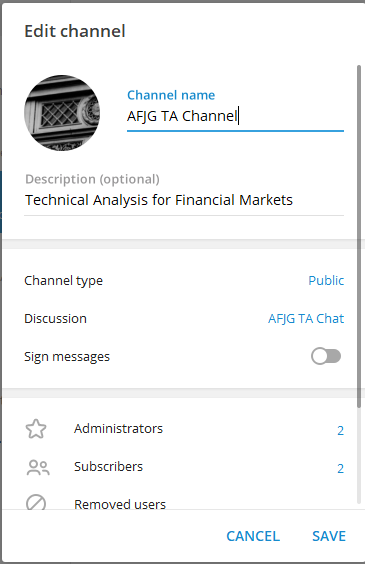
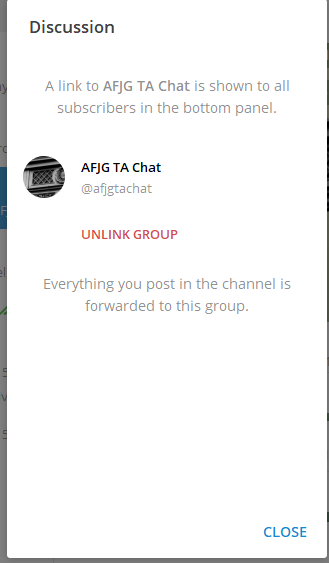

#### If you look at AFJG TA Chat you will see that it has been linked to AFJG TA Channel. Also note bot Channel and  Group are Public group - this is necessary.

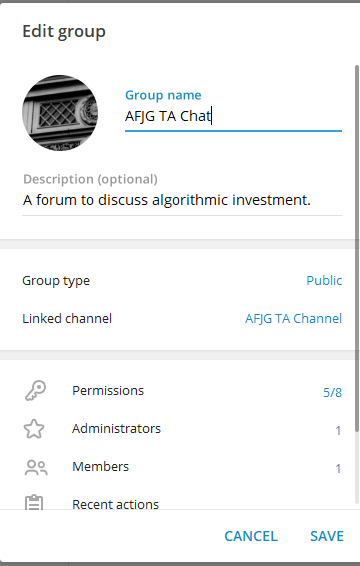
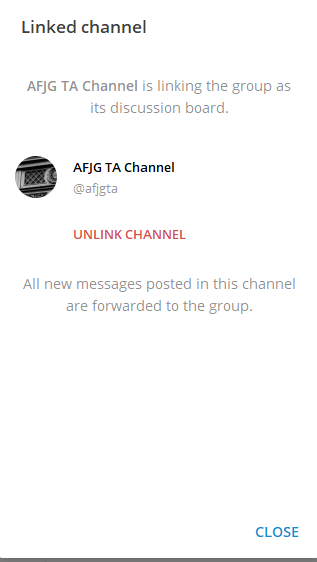


#### The following is how you send a message from the AFJG Bot to the AFJG TA Channel (a Telegram 'Channel'). Which is then automatically copied to AFJG Chat (a Telegram 'Group')

The Channel is Read Only, the Group is open for public comments and chatting.

In [2]:
#pip install python-telegram-bot
import telegram
import time
import schedule
from time import gmtime, strftime
from pathlib import Path
#afjg TOKEN = '1220480545:AAHXqgKKSwwHB0g82B0Mzm-wzVBK3f4iU3Y'
#ajjcbot
TOKEN = '1418492832:AAFMNb3dD6XsAikvU4sh6jMZirzSrPVCx6A'
#CHAT_IDS = ['@afjgta']
#CHAT_IDS = ['@AFJGTestChat']
###afjg original CHAT_IDS = ['@AFJGTestChannel','@AFJGTestChat']
CHAT_IDS = ['@hotchilianalytics', '@hotchilianalyticschat']
bot = telegram.Bot(token=TOKEN)



#### Instantiate a Bot
#### Get details of your Bot:

In [3]:
print(bot.get_me())

{'id': 1418492832, 'first_name': 'ChiliBot', 'is_bot': True, 'username': 'AjjcBot', 'can_join_groups': True, 'can_read_all_group_messages': False, 'supports_inline_queries': True}


### Construct Paths for the Files to be broadcast

In [4]:
import os
hca_root_path = os.environ['HCA_ROOT']
print(f"hca_root_path = {hca_root_path}")

hca_root_path = /home/hca-dev/hca


In [5]:
TELEGRAM_PATH = hca_root_path + "/telegram/"

RESULTS_CSV = TELEGRAM_PATH + "results.csv"

CHARTS = TELEGRAM_PATH + 'charts.png'
START = TELEGRAM_PATH + 'start_command.csv'
TEXTSTART = TELEGRAM_PATH +  'start_command.txt'
HELP = TELEGRAM_PATH + 'help_command.txt'
EXIT = TELEGRAM_PATH + 'exit_command.txt'
ABOUT = TELEGRAM_PATH + 'about_command.txt'
TRADE = TELEGRAM_PATH + 'trade_command.txt'

LOG = TELEGRAM_PATH + 'log.log'

print(f"""
TELEGRAM_PATH        = {TELEGRAM_PATH}
RESULTS_CSV          = {RESULTS_CSV}
CHARTS               = {CHARTS}
LOG                  = {LOG}
START                = {START}
TEXTSTART            = {TEXTSTART}
HELP                 = {HELP}
EXIT                 = {EXIT}
ABOUT                = {ABOUT}
TRADE                = {TRADE}


Contents of telegram directory:
""")
!ls $TELEGRAM_PATH


TELEGRAM_PATH        = /home/hca-dev/hca/telegram/
RESULTS_CSV          = /home/hca-dev/hca/telegram/results.csv
CHARTS               = /home/hca-dev/hca/telegram/charts.png
LOG                  = /home/hca-dev/hca/telegram/log.log
START                = /home/hca-dev/hca/telegram/start_command.csv
TEXTSTART            = /home/hca-dev/hca/telegram/start_command.txt
HELP                 = /home/hca-dev/hca/telegram/help_command.txt
EXIT                 = /home/hca-dev/hca/telegram/exit_command.txt
ABOUT                = /home/hca-dev/hca/telegram/about_command.txt
TRADE                = /home/hca-dev/hca/telegram/trade_command.txt


Contents of telegram directory:

about_command.txt  help_command.txt  results_orig.csv	TelegramBot.ipynb
charts.png	   log.log	     start_command.csv	trade_command.txt
exit_command.txt   results.csv	     start_command.txt


In [6]:
#import logging
#logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
#                     level=logging.INFO)
import logging

# return a logger with the specified name & creating it if necessary
logger = logging.getLogger(__name__)

# create a logger handler, in this case: file handler
file_handler = logging.FileHandler(LOG)
# set the level of logging to INFO
file_handler.setLevel(logging.INFO)

# create a logger formatter
logging_format = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")

# add the format to the logger handler
file_handler.setFormatter(logging_format)

# add the handler to the logger
logger.addHandler(file_handler)


In [7]:
photo_caption_1 = "Latest Charts for Segmec System"

### Code for Broadcasting to the Channel

In [8]:
#functions
def post_message(message):
    """
    Posts a message to the telegram bot chats / or channel
    :param str message: A string message
    :return: None
    """
    try:
        for id in CHAT_IDS:
            bot.send_message(id, message)
    except:
        print('error handling code to be drafted')
    return



def post_photo(photo,caption):
    """
    Posts a photo to the telegram bot chats / or channel
    :param str message: A string message
    :return: None
    """
    try:
        for id in CHAT_IDS:
            bot.send_photo(id, photo = open(photo,'rb'),caption= caption)
    except:
        print('error handling code to be drafted')
    return

def post_file_content(file):
    """
    Open file and convert content to string
    :param csv fie
    :return: None
    """
    try:
        with open(file) as f:
            s = f.read() #+ '\n' # add trailing new line character
            f.close()
        for id in CHAT_IDS:
            bot.send_message(id, s)
    except:
        print('error handling code to be drafted')
    return

def read_text(file):
    """
    Open file and convert content to string, return string
    :param csv file
    :return: String
    """
    try:
        with open(file) as f:
            s = f.read() 
    except:
        print('error handling code to be drafted')
    return s

#telegram.Bot(token=TOKEN).send_photo('@afjgta', photo = open(photo,'rb'),caption= caption)

####  The following function contains the jobs to be scheduled

In [9]:
def job():
    post_file_content(RESULTS_CSV)
    post_photo(CHARTS,photo_caption_1)    
    return

#### And here is the scheduler which is just left running

In [10]:
# Scheduling
#schedule.every(20).seconds.do(job)

#schedule.every(30).seconds.do(post_message, message = SMA)
#schedule.every(40).seconds.do(post_message, message = LMA)
#schedule.every().hour.do(job)
#schedule.every().day.at("10:30").do(job)
#schedule.every(5).to(10).minutes.do(job)
#schedule.every().monday.do(job)
###schedule.every().sunday.at("18:55").do(job)
#schedule.every().minute.at(":17").do(job)

#while True:
   #schedule.run_pending()
   #time.sleep(1)


### Code for the Bot's Responses to Commands

In [11]:
from telegram.ext import CommandHandler
from telegram.ext import Updater
updater = Updater(token=TOKEN, use_context=True)
dispatcher = updater.dispatcher

In [12]:
def start(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(TEXTSTART))

start_handler = CommandHandler('start', start)
dispatcher.add_handler(start_handler)

In [13]:
def help(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(HELP))

help_handler = CommandHandler('help', help)
dispatcher.add_handler(help_handler)

In [14]:
def so(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(RESULTS_CSV))

so_handler = CommandHandler('so', so)
dispatcher.add_handler(so_handler)

In [15]:
def sbt(update, context):
    context.bot.send_photo(chat_id=update.effective_chat.id,photo = open(CHARTS,'rb'),caption= photo_caption_1)

sbt_handler = CommandHandler('sbt', sbt)
dispatcher.add_handler(sbt_handler)

In [16]:
def about(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(ABOUT))

about_handler = CommandHandler('about', about)
dispatcher.add_handler(about_handler)

In [17]:
def trade(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(TRADE))

trade_handler = CommandHandler('trade', trade)
dispatcher.add_handler(trade_handler)

In [18]:
def exit(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text=read_text(EXIT))

exit_handler = CommandHandler('exit', exit)
dispatcher.add_handler(exit_handler)

In [19]:
def stats(update, context):
    # Send a message with the stats
    msg = (
        "HCA Strat: "
        + " stats: "
        + str(10.0)
    )
    update.message.reply_text(msg)

# on different commands - answer in Telegram
stats_handler = CommandHandler('stats', stats)
dispatcher.add_handler(stats_handler)


In [20]:
from telegram.ext import MessageHandler, Filters
def unknown(update, context):
    context.bot.send_message(chat_id=update.effective_chat.id, text="Sorry, I didn't understand that command.")

unknown_handler = MessageHandler(Filters.command, unknown)
dispatcher.add_handler(unknown_handler)

In [ ]:
updater.start_polling()
# Run the bot until you press Ctrl-C or the process receives SIGINT,
    # SIGTERM or SIGABRT. This should be used most of the time, since
    # start_polling() is non-blocking and will stop the bot gracefully.
updater.idle()

Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/home/hca-dev/miniconda3/envs/hca/lib/python3.6/site-packages/telegram/ext/updater.py", line 465, in _network_loop_retry
    if not action_cb():
  File "/home/hca-dev/miniconda3/envs/hca/lib/python3.6/site-packages/telegram/ext/updater.py", line 420, in polling_action_cb
    allowed_updates=allowed_updates,
  File "<decorator-gen-155>", line 2, in get_updates
  File "/home/hca-dev/miniconda3/envs/hca/lib/python3.6/site-packages/telegram/bot.py", line 135, in decorator
    result = func(*args, **kwargs)
  File "/home/hca-dev/miniconda3/envs/hca/lib/python3.6/site-packages/telegram/bot.py", line 2639, in get_updates
    'getUpdates', data, timeout=float(read_latency) + float(timeout), api_kwargs=api_kwargs
  File "/home/hca-dev/miniconda3/envs/hca/lib/python3.6/site-pa